In [1]:
# -------------------------------------------------------------------------------------------
# TO DO: remember to update the data!
# DATA REPOSITORY: https://github.com/pcm-dpc/COVID-19

# By Andrea Moscatello,
# First release: 11/04/2020
# Last update: 13/01/2021
# https://sites.google.com/view/a-moscatello/home
# ---------------------------------------------------------------------------------------------

import csv
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import datetime
import pandas as pd

#obtaining the current working directory
cwd = os.getcwd()
print(cwd)

/home/andrea/Scrivania/covid


In [2]:
# acquire national data
# output gives all the different data lists
def analisi_nazionale():
    os.chdir(f"{cwd}/COVID-19/trunk/dati-andamento-nazionale")
    ricoverati_con_sintomi_N = []
    terapia_intensiva_N = []
    totale_ospedalizzati_N = []
    isolamento_domiciliare_N = []
    totale_positivi_N = []
    variazione_totale_positivi_N = []
    nuovi_positivi_N = []
    dimessi_guariti_N = []
    deceduti_N = []
    totale_casi_N = []
    tamponi_N = []
    lista_file = os.listdir()
    lista_file.sort() # ordino i file in ordine crescente
    for file in lista_file:
        if file != "dpc-covid19-ita-andamento-nazionale.csv" and file != "dpc-covid19-ita-andamento-nazionale-latest.csv" and file[0] == "d":
            with open(file, newline="", encoding="ISO-8859-1") as nazionecsv:
                lettore = csv.reader(nazionecsv, delimiter=",")
                for linea in lettore:
                     if linea[0]!="data":
                        ricoverati_con_sintomi_N.append(int(linea[2]))
                        terapia_intensiva_N.append(int(linea[3]))
                        totale_ospedalizzati_N.append(int(linea[4]))
                        isolamento_domiciliare_N.append(int(linea[5]))
                        totale_positivi_N.append(int(linea[6]))
                        variazione_totale_positivi_N.append(int(linea[7]))
                        nuovi_positivi_N.append(int(linea[8]))
                        dimessi_guariti_N.append(int(linea[9]))
                        deceduti_N.append(int(linea[10]))
                        totale_casi_N.append(int(linea[13]))
                        tamponi_N.append(int(linea[14]))
    return(ricoverati_con_sintomi_N, terapia_intensiva_N, totale_ospedalizzati_N, \
    isolamento_domiciliare_N, totale_positivi_N, variazione_totale_positivi_N, nuovi_positivi_N, dimessi_guariti_N, deceduti_N, totale_casi_N, tamponi_N)


In [3]:
# acquire regional data
# input reads a string with the region name. eg: "Veneto"
# output gives all the different data lists
def analisi_regione(regione):
    os.chdir(f"{cwd}/COVID-19/trunk/dati-regioni")
    ricoverati_con_sintomi_R = []
    terapia_intensiva_R = []
    totale_ospedalizzati_R = []
    isolamento_domiciliare_R = []
    totale_positivi_R = []
    variazione_totale_positivi_R = []
    nuovi_positivi_R = []
    dimessi_guariti_R = []
    deceduti_R = []
    totale_casi_R = []
    tamponi_R = []
    lista_file = os.listdir()
    lista_file.sort() # ordino i file in ordine crescente
    for file in lista_file:
        if file != "dpc-covid19-ita-regioni.csv" and file != "dpc-covid19-ita-regioni-latest.csv" and file[0] == "d":
            with open(file, newline="", encoding="ISO-8859-1") as regionecsv:
                lettore = csv.reader(regionecsv, delimiter=",")
                for linea in lettore:
                    if linea[0] != "data" and linea[3] == regione:
                        ricoverati_con_sintomi_R.append(int(linea[6]))
                        terapia_intensiva_R.append(int(linea[7]))
                        totale_ospedalizzati_R.append(int(linea[8]))
                        isolamento_domiciliare_R.append(int(linea[9]))
                        totale_positivi_R.append(int(linea[10]))
                        variazione_totale_positivi_R.append(int(linea[11]))
                        nuovi_positivi_R.append(int(linea[12]))
                        dimessi_guariti_R.append(int(linea[13]))
                        deceduti_R.append(int(linea[14]))
                        totale_casi_R.append(int(linea[17]))
                        tamponi_R.append(int(linea[18]))
    return(ricoverati_con_sintomi_R, terapia_intensiva_R, totale_ospedalizzati_R, \
    isolamento_domiciliare_R, totale_positivi_R, variazione_totale_positivi_R, nuovi_positivi_R, dimessi_guariti_R, deceduti_R, totale_casi_R, tamponi_R)

In [4]:
# acquire city data
# input reads a string with the city name. eg: "Verona"
# output gives the data list with the total positive cases
def analisi_provincia(provincia):
    os.chdir(f"{cwd}/COVID-19/trunk/dati-province")
    evoluzione = []
    lista_file = os.listdir()
    lista_file.sort() # ordino i file in ordine crescente
    for file in lista_file:
        if file != "dpc-covid19-ita-province.csv" and file != "dpc-covid19-ita-province-latest.csv" and file[0] == "d":
            with open(file, newline="", encoding="ISO-8859-1") as provinciacsv:
                lettore = csv.reader(provinciacsv, delimiter=",")
                for linea in lettore:
                    if linea[5] == provincia:
                        casi = (int(linea[9]))
                        evoluzione.append(casi)
    return(evoluzione)


In [5]:
# calculate the derivative of a single data list. Optional.
def derivata(lista):
    derivata = []
    for i in range(len(lista)):
        if i == 0:
            derivata.append(0)
        else:
            derivata.append(lista[i]-lista[i-1])
    return(derivata)

# end definitions #
# ------------------------------------------------------------------------------

In [6]:
# acquire the data
ricoverati_con_sintomi_N, terapia_intensiva_N, totale_ospedalizzati_N, \
isolamento_domiciliare_N, totale_positivi_N, variazione_totale_positivi_N, nuovi_positivi_N, dimessi_guariti_N, deceduti_N, totale_casi_N, tamponi_N = analisi_nazionale()

ricoverati_con_sintomi_R, terapia_intensiva_R, totale_ospedalizzati_R, \
isolamento_domiciliare_R, totale_positivi_R, variazione_totale_positivi_R, nuovi_positivi_R, dimessi_guariti_R, deceduti_R, totale_casi_R, tamponi_R = analisi_regione("Veneto")

In [7]:
# generate a day/month list for temporal evolution
datelist = pd.date_range(start = "24-2-2020", periods = len(deceduti_R))
my_dates = []
for date in datelist.tolist():
    dd = date.day
    mm = date.month
    str = f"{dd}/{mm}"
    my_dates.append(str)

In [8]:
rapporto_positivi_tamponi_R = []
for i in range(len(tamponi_R)):
    rapporto_positivi_tamponi_R.append(nuovi_positivi_R[i]/totale_casi_R[i])
rapporto_positivi_tamponi_N = []
for i in range(len(tamponi_N)):
    rapporto_positivi_tamponi_N.append(nuovi_positivi_N[i]/totale_casi_N[i])

In [9]:
# compute the derivatives of the data I want to plot. May be chanced as necessary.
derivata_totale_positivi_R = derivata(totale_positivi_R)
derivata_totale_positivi_N = derivata(totale_positivi_N)
derivata_deceduti_R = derivata(deceduti_R)
derivata_deceduti_N = derivata(deceduti_N)
derivata_totale_ospedalizzati_R = derivata(totale_ospedalizzati_R)
derivata_totale_ospedalizzati_N = derivata(totale_ospedalizzati_N)
derivata_ricoverati_con_sintomi_R = derivata(ricoverati_con_sintomi_R)
derivata_ricoverati_con_sintomi_N = derivata(ricoverati_con_sintomi_N)
derivata_terapia_intensiva_R = derivata(terapia_intensiva_R)
derivata_terapia_intensiva_N = derivata(terapia_intensiva_N)


In [10]:
"""
This was optimized for running on a Ubuntu window, via web it may not be optimal. Minor graphical adjustment may be required.
"""

'\nThis was optimized for running on a Ubuntu window, via web it may not be optimal. Minor graphical adjustment may be required.\n'

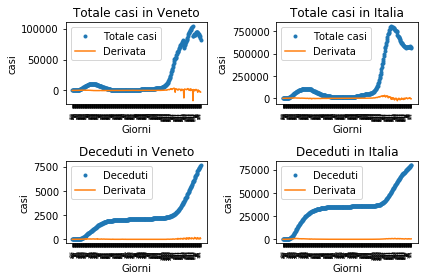

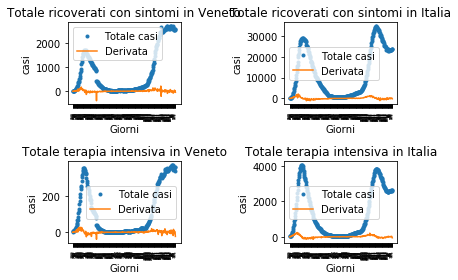

In [11]:
"""
In the following you can modify what you want. Those are the data I thought were more relevant.
You just need to change the list name, and eventually the x-axis list if you want to perform a cross-data analysis and not the temporal evolution of a single list (e.g. death vs. total cases)
"""

# plots
plt.figure()
plt.subplot(2, 2, 1)
plt.plot(my_dates, totale_positivi_R, ".", label = "Totale casi")
plt.plot(my_dates, derivata_totale_positivi_R, label = "Derivata")
plt.title("Totale casi in Veneto")
plt.xlabel("Giorni")
plt.xticks(fontsize = 3, rotation=90)
plt.ylabel("casi")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(my_dates, totale_positivi_N, ".", label = "Totale casi")
plt.plot(my_dates, derivata_totale_positivi_N, label = "Derivata")
plt.title("Totale casi in Italia")
plt.xlabel("Giorni")
plt.xticks(fontsize = 3, rotation=90)
plt.ylabel("casi")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(my_dates, deceduti_R, ".", label = "Deceduti")
plt.plot(my_dates, derivata_deceduti_R, label = "Derivata")
plt.title("Deceduti in Veneto")
plt.xlabel("Giorni")
plt.xticks(fontsize = 3, rotation=90)
plt.ylabel("casi")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(my_dates, deceduti_N, ".", label = "Deceduti")
plt.plot(my_dates, derivata_deceduti_N, label = "Derivata")
plt.title("Deceduti in Italia")
plt.xlabel("Giorni")
plt.xticks(fontsize = 3, rotation=90)
plt.ylabel("casi")
plt.legend()

plt.tight_layout()

# Plot il numero di ricoverati (in terapia intensiva e non)
plt.figure()
plt.subplot(2, 2, 1)
plt.plot(my_dates, ricoverati_con_sintomi_R, ".", label = "Totale casi")
plt.plot(my_dates, derivata_ricoverati_con_sintomi_R, label = "Derivata")
plt.title("Totale ricoverati con sintomi in Veneto")
plt.xlabel("Giorni")
plt.xticks(fontsize = 3, rotation=90)
plt.ylabel("casi")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(my_dates, ricoverati_con_sintomi_N, ".", label = "Totale casi")
plt.plot(my_dates, derivata_ricoverati_con_sintomi_N, label = "Derivata")
plt.title("Totale ricoverati con sintomi in Italia")
plt.xlabel("Giorni")
plt.xticks(fontsize = 3, rotation=90)
plt.ylabel("casi")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(my_dates, terapia_intensiva_R, ".", label = "Totale casi")
plt.plot(my_dates, derivata_terapia_intensiva_R, label = "Derivata")
plt.title("Totale terapia intensiva in Veneto")
plt.xlabel("Giorni")
plt.xticks(fontsize = 3, rotation=90)
plt.ylabel("casi")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(my_dates, terapia_intensiva_N, ".", label = "Totale casi")
plt.plot(my_dates, derivata_terapia_intensiva_N, label = "Derivata")
plt.title("Totale terapia intensiva in Italia")
plt.xlabel("Giorni")
plt.xticks(fontsize = 3, rotation=90)
plt.ylabel("casi")
plt.legend()

plt.tight_layout()
plt.show()